Завдання 1. Перші 5 рядків датасету Ірис:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

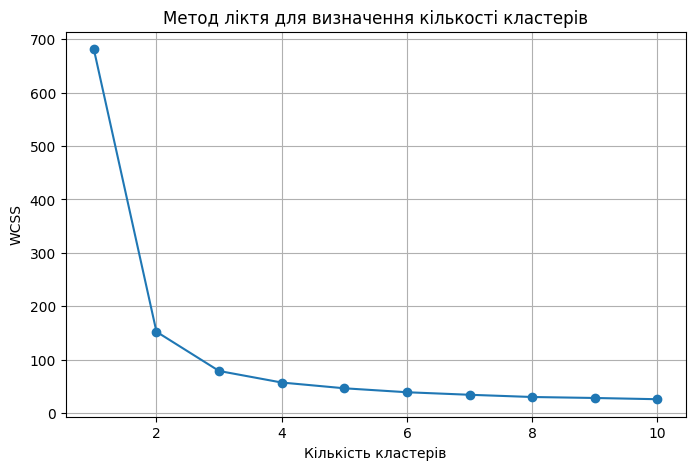

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

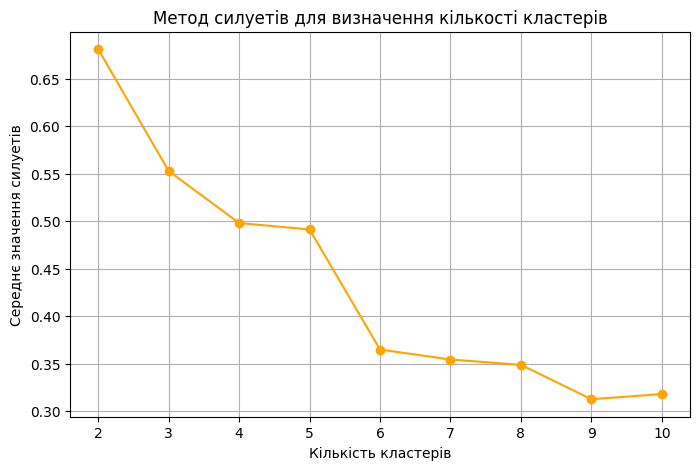

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


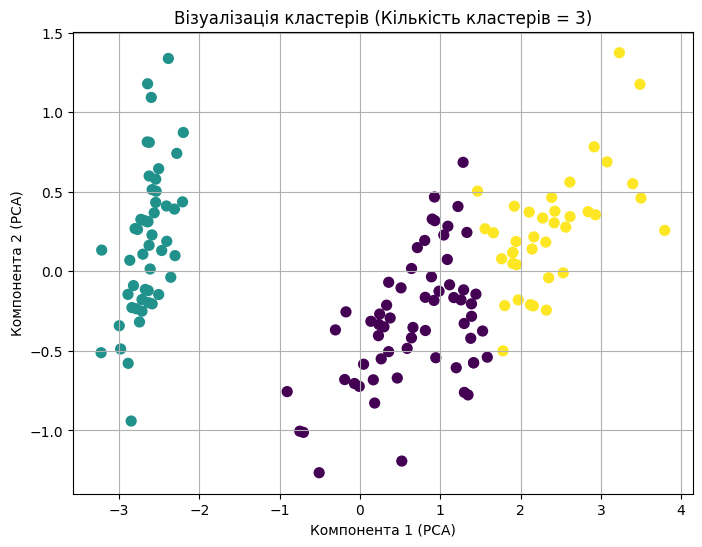

Завдання 1. Висновки:
Оптимальна кількість кластерів за методом ліктя: 3
Найвищий середній показник силуетів за 3 кластерів.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Завантаження датасету Ірис
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Роздрукувати перші 5 рядків
print("Завдання 1. Перші 5 рядків датасету Ірис:")
print(df.head())

# Визначення оптимальної кількості кластерів за допомогою методу ліктя
wcss = []
range_clusters = range(1, 11)
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)  # WCSS (within-cluster sum of squares)

# Побудова графіка методу ліктя
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, wcss, marker='o')
plt.title('Метод ліктя для визначення кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Визначення оптимальної кількості кластерів за допомогою методу силуетів
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Побудова графіка методу силуетів
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title('Метод силуетів для визначення кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середнє значення силуетів')
plt.grid(True)
plt.show()

# Візуалізація кластерів (для візуалізації зменшуємо кількість вимірів до 2 за допомогою PCA)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Оптимальна кількість кластерів на основі обраного методу (наприклад, 3 за методом ліктя)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df)

# Візуалізація кластерів
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster'], cmap='viridis', s=50)
plt.title(f'Візуалізація кластерів (Кількість кластерів = {optimal_clusters})')
plt.xlabel('Компонента 1 (PCA)')
plt.ylabel('Компонента 2 (PCA)')
plt.grid(True)
plt.show()

# Висновки
print("Завдання 1. Висновки:")
print(f"Оптимальна кількість кластерів за методом ліктя: 3")
print(f"Найвищий середній показник силуетів за {optimal_clusters} кластерів.")
